# IND6212 Project
---

# Preprocessing

In [1]:
# import libraries
import csv
import numpy as np

In [2]:
# if runned on colaboratory
GOOGLE = False
if GOOGLE:
    # Load the Drive helper and mount
    from google.colab import drive
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/EPM/PhD/IND6212/Projet/"
else:
    path = ""

In [3]:
# read intakes
with open('{}data/aac_intakes.csv'.format(path), 'r') as file:
    reader = csv.reader(file)
    header_intake = next(reader)
    intakes = [[value for value in row] for row in reader]

In [4]:
# read outcomes
with open('{}data/aac_outcomes.csv'.format(path), 'r') as file:
    reader = csv.reader(file)
    header_outcome = next(reader)
    outcomes = [[value for value in row] for row in reader]

In [5]:
# convert numpy array
header_intake = np.asarray(header_intake)
header_outcome = np.asarray(header_outcome)

intakes = np.asarray(intakes)
outcomes = np.asarray(outcomes)

In [6]:
print("Intakes")
for i, c in enumerate(header_intake):
    print("{} : {}".format(i, c))

Intakes
0 : age_upon_intake
1 : animal_id
2 : animal_type
3 : breed
4 : color
5 : datetime
6 : datetime2
7 : found_location
8 : intake_condition
9 : intake_type
10 : name
11 : sex_upon_intake


In [7]:
print("Outcomes")
for i, c in enumerate(header_outcome):
    print("{} : {}".format(i, c))

Outcomes
0 : age_upon_outcome
1 : animal_id
2 : animal_type
3 : breed
4 : color
5 : date_of_birth
6 : datetime
7 : monthyear
8 : name
9 : outcome_subtype
10 : outcome_type
11 : sex_upon_outcome


In [8]:
# get the last outcome (it can be transfered multiple times, we want the last update)
# if no outcome, then we remove the example (line)
counter = 0
data = []
for i, x in enumerate(intakes, 1):
    index = np.where(outcomes[:, 1] == x[1])
    if len(index[0]) > 0 and outcomes[index[0][-1], 10]:
        data.append(np.concatenate((x, [outcomes[index[0][-1], 10]])))
    else:
        counter += 1
    print("\r{} | {}".format(i - counter, counter), end=" ")

79776 | 411                                                                                                                                                                        

In [9]:
# add the outcome to data
data = np.asarray(data)
header = np.concatenate((header_intake, ["outcome"]))

The author of the dataset explained that Rto-Adopt = Return to Owner and Disposal = Died (see [link](https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/discussion/56707#latest-329163))

In [10]:
for row in data:
    if row[-1] == "Rto-Adopt":
        row[-1]="Return to Owner"
    if row[-1] == "Disposal":
        row[-1]="Died"

In [11]:
# remove the animal id
data = np.delete(data, 1, axis=1)
header = np.delete(header, 1, axis=0)

In [12]:
# convert intake date into a real value (year)
for x in data:
    s = x[0].split()
    if "year" in s[1]:
        x[0] = float(s[0])
    if "month" in s[1]:
        x[0] = float(s[0]) / 12.
    if "week" in s[1]:
        x[0] = float(s[0]) / 52.
    if "day" in s[1]:
        x[0] = float(s[0]) / 365.

In [13]:
# convertir animal breed to integer
mapping_breed, breed_int = np.unique(data[:, 2], return_inverse=True)
data = np.delete(data, [1, 2], axis=1)
header = np.delete(header, [1, 2], axis=0)
data = np.concatenate((data, breed_int.reshape(-1, 1)), axis=1)
header = np.concatenate((header, ["animal_breed"]))

In [14]:
print(mapping_breed)

['Abyssinian Mix' 'Affenpinscher Mix' 'Afghan Hound Mix' ...
 'Yorkshire Terrier/Standard Poodle' 'Yorkshire Terrier/Toy Poodle'
 'Yorkshire Terrier/Yorkshire Terrier']


In [15]:
# convert color to integer
mapping_color, color_int = np.unique(data[:, 1], return_inverse=True)
data = np.delete(data, 1, axis=1)
header = np.delete(header, 1, axis=0)
data = np.concatenate((data, color_int.reshape(-1, 1)), axis=1)
header = np.concatenate((header, ["color"]))

In [16]:
# remove location
data = np.delete(data, 3, axis=1)
header = np.delete(header, 3, axis=0)

In [17]:
# check if datetime and datetime2 are identical
if np.array_equal(data[:, 1], data[:, 2]):
    print("Datetime duplicated")
else:
    print("Datetime not duplicated")

Datetime duplicated


In [18]:
# remove datetime2
data = np.delete(data, 2, axis=1)
header = np.delete(header, 2, axis=0)

In [19]:
# convert condition to integer
mapping_condition, condition_int = np.unique(data[:, 2], return_inverse=True)
data = np.delete(data, 2, axis=1)
header = np.delete(header, 2, axis=0)
data = np.concatenate((data, condition_int.reshape(-1,1)), axis=1)
header = np.concatenate((header, ["condition"]))

In [20]:
# convert type to integer
mapping_type, type_int = np.unique(data[:, 2], return_inverse=True)
data = np.delete(data, 2, axis=1)
header = np.delete(header, 2, axis=0)
data = np.concatenate((data, type_int.reshape(-1,1)), axis=1)
header = np.concatenate((header, ["type"]))

In [21]:
# check if name as any impact
out = list(set(data[:,4]))
out_name = [0 for _ in out]
out_noname = [0 for _ in out]
name, noname = 0, 0

for d in data:
    if d[2]:
        name += 1
        out_name[out.index(d[4])] += 1
    else:
        noname += 1
        out_noname[out.index(d[4])] += 1
out_noname = [o/noname for o in out_noname]
out_name = [o/name for o in out_name]

print("{:20s} | {:^15s} | {:^15s}".format("Outcome", "with name", "without name"))
print("-"*56)
for a, b, c in zip(out, out_name, out_noname):
    print("{:20s} | {:^15.2%} | {:^15.2%}".format(a, b, c))

Outcome              |    with name    |  without name  
--------------------------------------------------------
Missing              |      0.06%      |      0.04%     
Relocate             |      0.00%      |      0.06%     
Return to Owner      |     25.85%      |      1.91%     
Adoption             |     50.43%      |     23.37%     
Euthanasia           |      2.66%      |     19.92%     
Transfer             |     20.55%      |     51.64%     
Died                 |      0.45%      |      3.05%     


In [22]:
# the presence of a name seems to have an impact on the outcome
# its value should not have any effect (difficult to evaluate)
# replace absence of a name by 0 and presence of a name by 1
for row in data:
    row[2] = 1 if row[2] else 0

In [23]:
# sex analysis
sex, count = np.unique(data[:, 3], return_counts=True)
for s, c in zip(sex, count):
    print("{:20s} : {:6d} ({:6.1%})".format(s, c, c / data.shape[0]))

Intact Female        :  23739 ( 29.8%)
Intact Male          :  25355 ( 31.8%)
NULL                 :      1 (  0.0%)
Neutered Male        :  12728 ( 16.0%)
Spayed Female        :  11168 ( 14.0%)
Unknown              :   6785 (  8.5%)


In [24]:
# check if name as any impact
out = list(set(data[:, 4]))
sex = list(set(data[:, 3]))
table = [[0 for _ in out] for _ in sex]
for d in data:
    table[sex.index(d[3])][out.index(d[4])] += 1

print(" " * 14, end="")
for o in out:
    print("{:^14s}".format(o), end="")
print("")
for i, s in zip(table, sex):
    print("{:^14s}".format(s), end="")
    for j in i:
        print("{:^14d}".format(j), end="")
    print("")

                 Missing       Relocate   Return to Owner   Adoption     Euthanasia     Transfer        Died     
   Unknown          2             14            84            70           3392          2747          476      
Spayed Female       4             0            3950          4690          377           2099           48      
Intact Female       19            1            2246         11972          882           8447          172      
     NULL           0             0             1             0             0             0             0       
Neutered Male       3             0            4958          4699          597           2429           42      
 Intact Male        18            0            3523         12178          1099          8282          255      


In [25]:
# we cannot remove unknown because it seems to have an impact on the outcome (extremly low adoption rate)
# there is only one NULL, which is suspect, we'll remove this
id = np.where(data[:,3] == "NULL")[0][0]
data = np.delete(data, id, axis=0)

In [26]:
# convert sex to integer
mapping_sex, sex_int = np.unique(data[:, 3], return_inverse=True)
data = np.delete(data, 3, axis=1)
header = np.delete(header, 3, axis=0)
data = np.concatenate((data, sex_int.reshape(-1,1)), axis=1)
header = np.concatenate((header, ["sex"]))

In [27]:
# keep only month for datetime
mapping_sex, sex_int = np.unique(data[:, 3], return_inverse=True)
for d in data:
    d[1] = int(d[1].split("-")[1])

In [28]:
# put labels (outcomes) in separate matrix
mapping_outcome, labels, outcomes_count = np.unique(data[:, 3], return_inverse=True, return_counts=True)
x = np.delete(data, 3, axis=1)
header = np.delete(header, 3, axis=0)

In [29]:
for o, c in zip(mapping_outcome, outcomes_count):
    print("{:20} : {:10} ({:5.2%})".format(o, c, float(c/len(labels))))

Adoption             :      33609 (42.13%)
Died                 :        993 (1.24%)
Euthanasia           :       6347 (7.96%)
Missing              :         46 (0.06%)
Relocate             :         15 (0.02%)
Return to Owner      :      14761 (18.50%)
Transfer             :      24004 (30.09%)


In [30]:
x = x.astype("float32")
labels = labels.astype("int")

In [31]:
for i, (row, label) in enumerate(zip(x, labels)):
    for h, value in zip(header, row):
        print("{:20s} : {}".format(h, value))
    print("\tOutcome: {}".format(label))
    print("-----------------------")
    if i > 2:
        break

age_upon_intake      : 8.0
datetime             : 7.0
name                 : 1.0
animal_breed         : 1007.0
color                : 498.0
condition            : 3.0
type                 : 3.0
sex                  : 3.0
	Outcome: 5
-----------------------
age_upon_intake      : 0.9166666865348816
datetime             : 4.0
name                 : 1.0
animal_breed         : 231.0
color                : 382.0
condition            : 3.0
type                 : 3.0
sex                  : 1.0
	Outcome: 5
-----------------------
age_upon_intake      : 0.07692307978868484
datetime             : 10.0
name                 : 0.0
animal_breed         : 952.0
color                : 194.0
condition            : 7.0
type                 : 3.0
sex                  : 0.0
	Outcome: 6
-----------------------
age_upon_intake      : 4.0
datetime             : 6.0
name                 : 1.0
animal_breed         : 924.0
color                : 415.0
condition            : 3.0
type                 : 3.0
sex   

In [32]:
# convert outcomes (y) to one_hot
y = np.eye(len(set(labels)))[labels]

In [33]:
print("Nb attributes: {}".format(x.shape[1]))
print("Nb different outcomes: {}".format(len(set(labels))))

Nb attributes: 8
Nb different outcomes: 7


# Model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [35]:
# function to plot the learning graphs
def plot_history(history, name=""):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # summarize history for accuracy
    axes[0].plot(history.history['acc'])
    axes[0].plot(history.history['val_acc'])
    axes[0].set_title('Model accuracy')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')

    axes[0].legend(['Train', 'Validation'], title="Dataset")
    # summarize history for loss
    axes[1].plot(history.history['loss'])
    axes[1].plot(history.history['val_loss'])
    axes[1].set_title('Model loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(['Train', 'Validation'], title="Dataset")

    plt.savefig("figures/{}.png".format(name), dpi=300)
    plt.show()
    plt.close()

In [36]:
#normalize x
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [37]:
# split dataset into a training, validation and test set
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, stratify=y)
# we split first (train/test) then (train/valid) 12.5% of 80% is the same as 10% of 100%
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, stratify=y_train)

In [38]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(55842, 8)
(7978, 8)
(15955, 8)


In [39]:
from keras import metrics
from keras import callbacks
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model

Using TensorFlow backend.


In [40]:
input = Input(shape=(8, ))
dense = BatchNormalization()(input)
dense = Dense(256)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.5)(dense)
dense = Activation('relu')(dense)
dense = Dense(128)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.5)(dense)
dense = Activation('relu')(dense)
dense = Dense(64)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.5)(dense)
dense = Activation('relu')(dense)
dense = Dense(7)(dense)
output = Activation('softmax')(dense)

model = Model(inputs=input, outputs=output)

model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2304      
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation_1 (Activat

In [41]:
history = model.fit(x_train, y_train,
                    batch_size=512,
                    epochs=9999,
                    verbose=1,
                    validation_data=(x_val, y_val),
                    callbacks=[callbacks.EarlyStopping(
                    monitor='val_acc',
                    min_delta=0.0001,
                    patience=25,
                    restore_best_weights=True)])

Instructions for updating:
Use tf.cast instead.
Train on 55842 samples, validate on 7978 samples
Epoch 1/9999
55842/55842 [==============================] - 6s 116us/step - loss: 1.5545 - acc: 0.4326 - val_loss: 1.1026 - val_acc: 0.5614
Epoch 2/9999
55842/55842 [==============================] - 2s 39us/step - loss: 1.1570 - acc: 0.5310 - val_loss: 0.9896 - val_acc: 0.5951
Epoch 3/9999
55842/55842 [==============================] - 2s 38us/step - loss: 1.0805 - acc: 0.5570 - val_loss: 0.9564 - val_acc: 0.6013
Epoch 4/9999
55842/55842 [==============================] - 2s 38us/step - loss: 1.0432 - acc: 0.5739 - val_loss: 0.9396 - val_acc: 0.6092
Epoch 5/9999
55842/55842 [==============================] - 2s 39us/step - loss: 1.0220 - acc: 0.5846 - val_loss: 0.9329 - val_acc: 0.6158
Epoch 6/9999
55842/55842 [==============================] - 2s 39us/step - loss: 1.0078 - acc: 0.5919 - val_loss: 0.9268 - val_acc: 0.6196
Epoch 7/9999
55842/55842 [==============================] - 2s 38us/

55842/55842 [==============================] - 2s 39us/step - loss: 0.9220 - acc: 0.6256 - val_loss: 0.8784 - val_acc: 0.6376
Epoch 58/9999
55842/55842 [==============================] - 2s 39us/step - loss: 0.9220 - acc: 0.6255 - val_loss: 0.8782 - val_acc: 0.6393
Epoch 59/9999
55842/55842 [==============================] - 2s 39us/step - loss: 0.9209 - acc: 0.6267 - val_loss: 0.8780 - val_acc: 0.6379
Epoch 60/9999
55842/55842 [==============================] - 2s 39us/step - loss: 0.9230 - acc: 0.6235 - val_loss: 0.8788 - val_acc: 0.6380
Epoch 61/9999
55842/55842 [==============================] - 2s 38us/step - loss: 0.9225 - acc: 0.6276 - val_loss: 0.8773 - val_acc: 0.6374
Epoch 62/9999
55842/55842 [==============================] - 2s 39us/step - loss: 0.9200 - acc: 0.6267 - val_loss: 0.8767 - val_acc: 0.6385
Epoch 63/9999
55842/55842 [==============================] - 2s 39us/step - loss: 0.9197 - acc: 0.6266 - val_loss: 0.8778 - val_acc: 0.6394
Epoch 64/9999
55842/55842 [=======

In [42]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8824538025203
Test accuracy: 0.6396114070786835


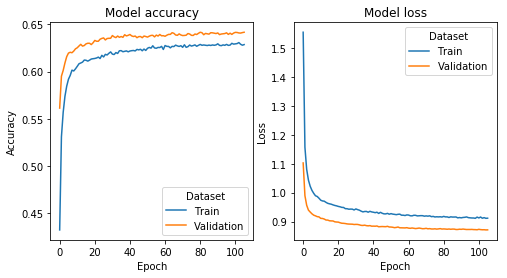

In [43]:
plot_history(history, "discret_multiclasse")

In [44]:
# not accurate enough, let's only check if the animal is adopted
binary_y = [int(label[0] == 1) for label in y]
# split dataset into a training, validation and test set
x_train, x_test, y_train, y_test = train_test_split(x_scaled, binary_y, test_size=0.2, stratify=binary_y)
# we split first (train/test) then (train/valid) 12.5% of 80% is the same as 10% of 100%
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, stratify=y_train)

In [45]:
input = Input(shape=(8, ))
dense = BatchNormalization()(input)
dense = Dense(256)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.5)(dense)
dense = Activation('relu')(dense)
dense = Dense(128)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.5)(dense)
dense = Activation('relu')(dense)
dense = Dense(64)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.5)(dense)
dense = Activation('relu')(dense)
dense = Dense(32)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.5)(dense)
dense = Activation('relu')(dense)
dense = Dense(1)(dense)
output = Activation('sigmoid')(dense)

model = Model(inputs=input, outputs=output)

model.compile(loss='binary_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 8)                 32        
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2304      
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
__________

In [46]:
history = model.fit(x_train, y_train,
                    batch_size=512,
                    epochs=9999,
                    verbose=1,
                    validation_data=(x_val, y_val),
                    callbacks=[callbacks.EarlyStopping(
                    monitor='val_acc',
                    min_delta=0.0001,
                    patience=25,
                    restore_best_weights=True)])

Train on 55842 samples, validate on 7978 samples
Epoch 1/9999
55842/55842 [==============================] - 5s 84us/step - loss: 0.7253 - acc: 0.5795 - val_loss: 0.5970 - val_acc: 0.6594
Epoch 2/9999
55842/55842 [==============================] - 3s 46us/step - loss: 0.6348 - acc: 0.6211 - val_loss: 0.5910 - val_acc: 0.6735
Epoch 3/9999
55842/55842 [==============================] - 3s 45us/step - loss: 0.6129 - acc: 0.6444 - val_loss: 0.5857 - val_acc: 0.6739
Epoch 4/9999
55842/55842 [==============================] - 3s 46us/step - loss: 0.6055 - acc: 0.6591 - val_loss: 0.5832 - val_acc: 0.6740
Epoch 5/9999
55842/55842 [==============================] - 3s 47us/step - loss: 0.5996 - acc: 0.6700 - val_loss: 0.5802 - val_acc: 0.6774
Epoch 6/9999
55842/55842 [==============================] - 3s 47us/step - loss: 0.5955 - acc: 0.6748 - val_loss: 0.5768 - val_acc: 0.6828
Epoch 7/9999
55842/55842 [==============================] - 3s 46us/step - loss: 0.5926 - acc: 0.6774 - val_loss: 0.5

55842/55842 [==============================] - 3s 46us/step - loss: 0.5526 - acc: 0.7046 - val_loss: 0.5383 - val_acc: 0.7160
Epoch 60/9999
55842/55842 [==============================] - 3s 46us/step - loss: 0.5530 - acc: 0.7049 - val_loss: 0.5388 - val_acc: 0.7165
Epoch 61/9999
55842/55842 [==============================] - 3s 46us/step - loss: 0.5536 - acc: 0.7053 - val_loss: 0.5384 - val_acc: 0.7166
Epoch 62/9999
55842/55842 [==============================] - 3s 46us/step - loss: 0.5540 - acc: 0.7075 - val_loss: 0.5379 - val_acc: 0.7165
Epoch 63/9999
55842/55842 [==============================] - 3s 46us/step - loss: 0.5539 - acc: 0.7059 - val_loss: 0.5381 - val_acc: 0.7165
Epoch 64/9999
55842/55842 [==============================] - 3s 46us/step - loss: 0.5538 - acc: 0.7053 - val_loss: 0.5382 - val_acc: 0.7170
Epoch 65/9999
55842/55842 [==============================] - 3s 45us/step - loss: 0.5532 - acc: 0.7048 - val_loss: 0.5381 - val_acc: 0.7163
Epoch 66/9999
55842/55842 [=======

55842/55842 [==============================] - 3s 46us/step - loss: 0.5483 - acc: 0.7065 - val_loss: 0.5342 - val_acc: 0.7201
Epoch 118/9999
55842/55842 [==============================] - 3s 46us/step - loss: 0.5482 - acc: 0.7082 - val_loss: 0.5336 - val_acc: 0.7195
Epoch 119/9999
55842/55842 [==============================] - 3s 46us/step - loss: 0.5469 - acc: 0.7083 - val_loss: 0.5333 - val_acc: 0.7184
Epoch 120/9999
55842/55842 [==============================] - 3s 47us/step - loss: 0.5484 - acc: 0.7075 - val_loss: 0.5338 - val_acc: 0.7199
Epoch 121/9999
55842/55842 [==============================] - 3s 46us/step - loss: 0.5482 - acc: 0.7081 - val_loss: 0.5327 - val_acc: 0.7197
Epoch 122/9999
55842/55842 [==============================] - 3s 46us/step - loss: 0.5474 - acc: 0.7082 - val_loss: 0.5332 - val_acc: 0.7194
Epoch 123/9999
55842/55842 [==============================] - 3s 45us/step - loss: 0.5480 - acc: 0.7100 - val_loss: 0.5333 - val_acc: 0.7186
Epoch 124/9999
55842/55842 [

In [47]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5355057043477832
Test accuracy: 0.707928549077809


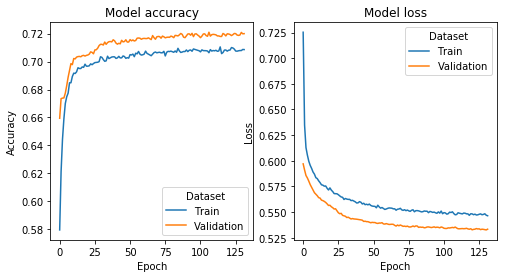

In [48]:
plot_history(history, "discret_binaire")

In [49]:
# Let's try with one hot vector input (except age, data which are real valued -> scaled version, and name that is arleady binary)
one_hot_animal_breed = np.eye(len(set(x[:,3])))[x[:,3].astype("int")]
one_hot_color = np.eye(len(set(x[:,4])))[x[:,4].astype("int")]
one_hot_condition = np.eye(len(set(x[:,5])))[x[:,5].astype("int")]
one_hot_type = np.eye(len(set(x[:,6])))[x[:,6].astype("int")]
one_hot_sex = np.eye(len(set(x[:,7])))[x[:,7].astype("int")]

x_one_hot = np.concatenate((x_scaled[:,:2], x[:,2].reshape(-1,1), one_hot_animal_breed, one_hot_color, one_hot_condition, one_hot_type, one_hot_sex), axis=1)

In [50]:
# split dataset into a training, validation and test set
x_train, x_test, y_train, y_test = train_test_split(x_one_hot, binary_y, test_size=0.2, stratify=binary_y)
# we split first (train/test) then (train/valid) 12.5% of 80% is the same as 10% of 100%
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, stratify=y_train)

In [51]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(55842, 2709)
(7978, 2709)
(15955, 2709)


In [52]:
input = Input(shape=(2709, ))
dense = BatchNormalization()(input)
dense = Dense(128)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.75)(dense)
dense = Activation('relu')(dense)
dense = Dense(64)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.75)(dense)
dense = Activation('relu')(dense)
dense = Dense(32)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.75)(dense)
dense = Activation('relu')(dense)
dense = Dense(1)(dense)
output = Activation('sigmoid')(dense)

model = Model(inputs=input, outputs=output)

model.compile(loss='binary_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 2709)              0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 2709)              10836     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               346880    
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
__________

In [53]:
history = model.fit(x_train, y_train,
                    batch_size=512,
                    epochs=9999,
                    verbose=1,
                    validation_data=(x_val, y_val),
                    callbacks=[callbacks.EarlyStopping(
                    monitor='val_acc',
                    min_delta=0.001,
                    patience=10,
                    restore_best_weights=True)])

Train on 55842 samples, validate on 7978 samples
Epoch 1/9999
55842/55842 [==============================] - 6s 105us/step - loss: 0.8562 - acc: 0.5224 - val_loss: 0.6559 - val_acc: 0.5866
Epoch 2/9999
55842/55842 [==============================] - 4s 67us/step - loss: 0.7218 - acc: 0.5479 - val_loss: 0.6313 - val_acc: 0.5900
Epoch 3/9999
55842/55842 [==============================] - 5s 81us/step - loss: 0.6625 - acc: 0.5805 - val_loss: 0.6107 - val_acc: 0.6049
Epoch 4/9999
55842/55842 [==============================] - 4s 66us/step - loss: 0.6354 - acc: 0.6037 - val_loss: 0.5921 - val_acc: 0.6718
Epoch 5/9999
55842/55842 [==============================] - 4s 65us/step - loss: 0.6177 - acc: 0.6206 - val_loss: 0.5769 - val_acc: 0.6920
Epoch 6/9999
55842/55842 [==============================] - 4s 66us/step - loss: 0.6057 - acc: 0.6381 - val_loss: 0.5675 - val_acc: 0.6989
Epoch 7/9999
55842/55842 [==============================] - 4s 78us/step - loss: 0.5983 - acc: 0.6489 - val_loss: 0.

In [54]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5766410543622734
Test accuracy: 0.719460984006342


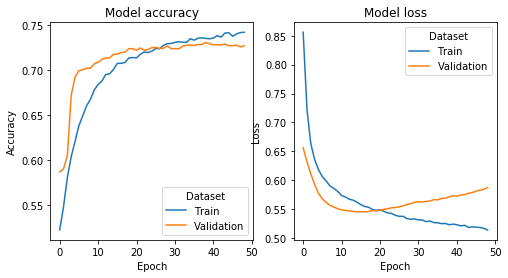

In [55]:
plot_history(history, "one_hot_binaire")